<a href="https://colab.research.google.com/github/anirudhawagh/Sales-Prediction-Retail-Chain-Rossmann-through-Regression-based-Machine-Learning-Initiative/blob/main/Retail_Sales_Prediction_By_Aniruddha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Sales Prediction :  Retail Chain "Rossmann" through Regression-based Machine Learning Initiative

#### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name -** Aniruddha Narayan Wagh


# **Project Summary -**

# **GitHub Link -**

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# ***Let's Begin !***

### Import Libraries

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [2]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Loading Rossman Dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv', low_memory= False)

In [4]:
#Loading Store Dataset
store_df=pd.read_csv('/content/drive/MyDrive/store.csv' , low_memory= False)

### Dataset First View

In [5]:
rossman_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


#### **Dataset Information**

In [7]:
# rossmann dataset info
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
# Store dataset info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Dataset Rows & Columns count

In [9]:
# total number of rows in rossmann dataframe
num_of_rows = rossman_df.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = rossman_df.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 1017209
Total no. of columns: 9


In [10]:
# total number of rows in store dataframe
num_of_rows = store_df.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = store_df.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 1115
Total no. of columns: 10


#### **Duplicate Values**

In [11]:
# number of duplicate rows
num_of_dup_rows = rossman_df.duplicated(["Store","Date"]).sum()
print(f"No. of duplicate rows in rossman dataset: {num_of_dup_rows}")

No. of duplicate rows in rossman dataset: 0


In [12]:
num_of_dup_rows = store_df.duplicated(["Store"]).sum()
print(f"No. of duplicate rows in store dataset: {num_of_dup_rows}")

No. of duplicate rows in store dataset: 0


#### **Missing Values/Null Values**

In [13]:
# Missing Values/Null Values Count for rossman
rossman_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

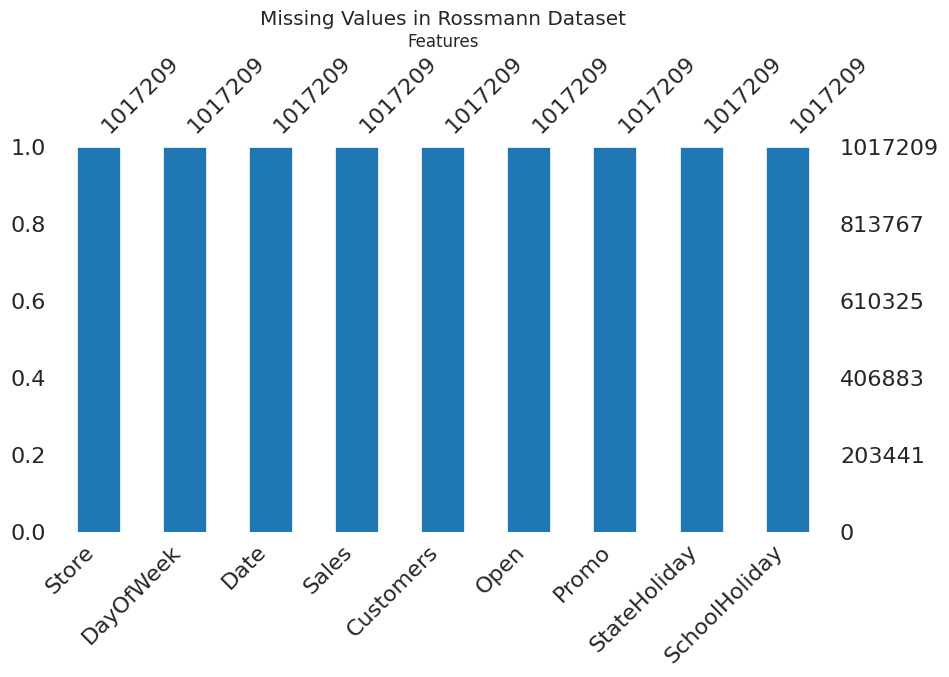

In [14]:
# Create a bar chart of missing values
msno.bar(rossman_df, figsize=(10, 5), color="tab:blue")

# Add title and labels
plt.title('Missing Values in Rossmann Dataset')
plt.xlabel('Features')
plt.ylabel('Percentage Missing')

# Show the plot
plt.show()

In [15]:
# Missing Values/Null Values Count for store
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

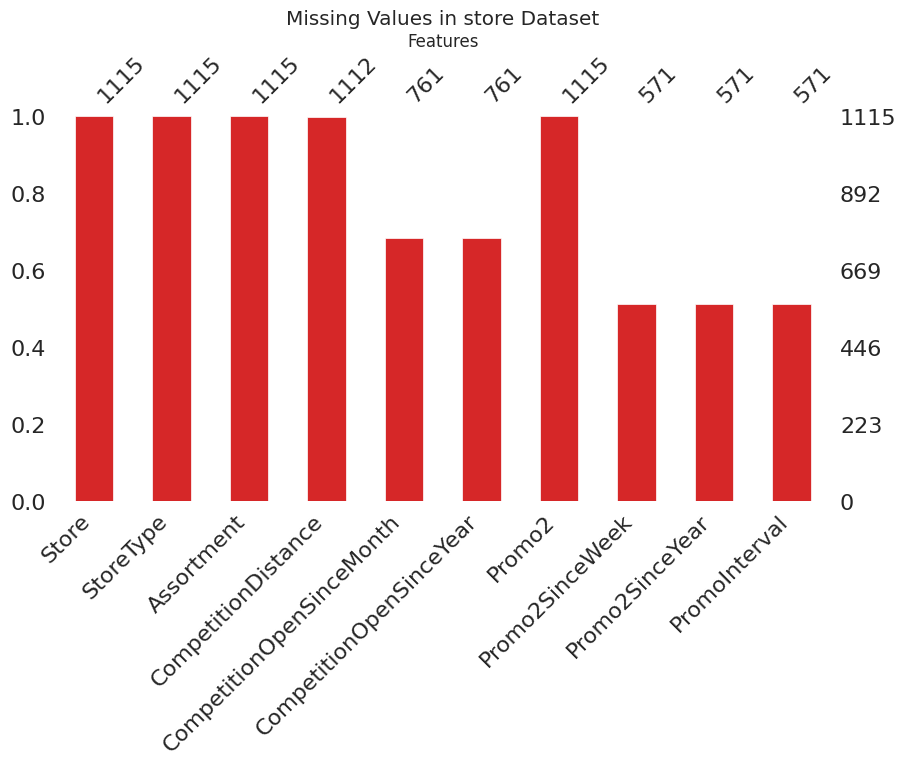

In [16]:
# Create a bar chart of missing values
msno.bar(store_df, figsize=(10, 5), color="tab:red")

# Add title and labels
plt.title('Missing Values in store Dataset')
plt.xlabel('Features')
plt.ylabel('Percentage Missing')

# Show the plot
plt.show()

In [17]:
# define a DataFrame to find the number and percentage of missing values in a dataframe
df_null_store = pd.DataFrame((store_df.isna().sum()/store_df.shape[0])*100)
df_null_store["count"] = list(store_df.isna().sum().values)
df_null_store.rename(columns={0:"% of Null Values"},inplace=True)
df_null_store.sort_values(by = ["count"],ascending = False)

,% of Null Values,count
Promo2SinceWeek,48.789238,544
Promo2SinceYear,48.789238,544
PromoInterval,48.789238,544
CompetitionOpenSinceMonth,31.748879,354
CompetitionOpenSinceYear,31.748879,354
CompetitionDistance,0.269058,3
Store,0.000000,0
StoreType,0.000000,0
Assortment,0.000000,0
Promo2,0.000000,0


### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [18]:
# Dataset Columns for rossman
list(rossman_df.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [19]:
# Dataset Columns for store
list(store_df.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [20]:
#Rossmann Dataset Describe
rossman_df.describe(include="all")

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [21]:
# Store dataset describe
store_df.describe(include="all")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### **Variables Description**


* Store - Store ID
* Sales - Sales for the given store on a given day (to be predicted)
* Customers - the number of customers on a given day (to be dropped)
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - 4 different store types: a, b, c, d
* Assortment - Assortment level: a = basic, b = extra, c = extended. Represents the number and type of products displayed by the store
* CompetitionDistance - distance to the nearest competitor store
* CompetitionOpenSince[Month/Year] - Approximate year and month of the time the nearest competitor was opened
* Promo - Show if a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - The year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#### **Check Unique Values for each variable**

In [22]:

# Check Unique Values in rossman
rossman_df.nunique()


Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int64

In [23]:
# check unique values in df_store
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

## 3. ***Data Wrangling***

In [24]:
#checking rows with null values in CompetitionDistance column
store_df[store_df["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


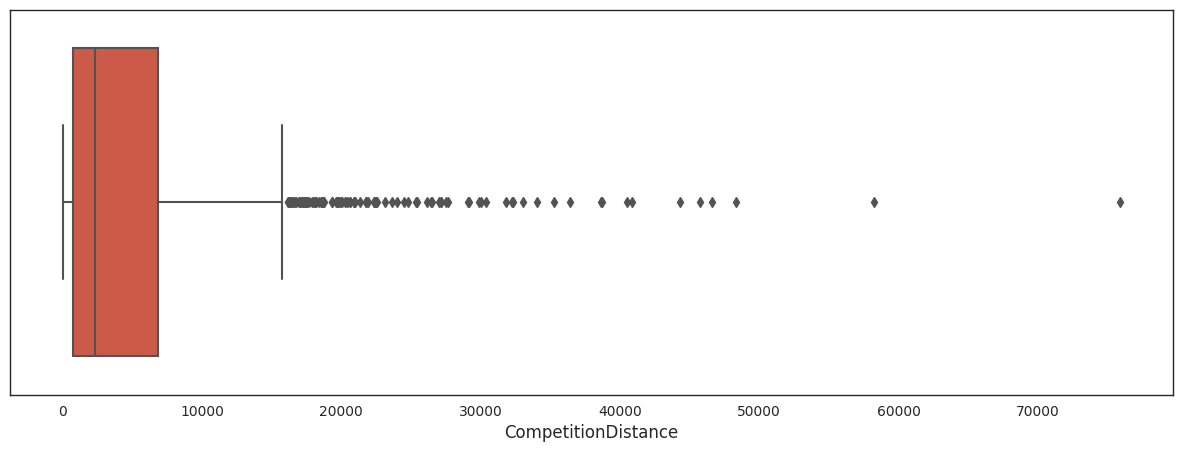

In [25]:
#plotting box plot to analyse the where most of the values are
plt.figure(figsize=(15,5))
sns.boxplot(x= store_df["CompetitionDistance"]);

In [26]:
#filling the missing values of Competition Distance with median
store_df['CompetitionDistance'].fillna(value = int(store_df.CompetitionDistance.median()), inplace = True)

In [27]:
from scipy.stats import skew

competition_distance_skewness = skew(store_df["CompetitionDistance"])
print(f"Skewness of CompetitionDistance: {competition_distance_skewness:.2f}")


Skewness of CompetitionDistance: 2.93


######The distribution of CompetitionDistance is positively skewed. So it is safe to impute missing values with mode or median.

#### **Merging datasets**

In [28]:
# Write your code to make your dataset analysis ready.

# merging two dataframes on store column using left join
df= rossman_df.merge(right=store_df,how="left",on="Store")
df.shape

(1017209, 18)

#### **Typecasting**

In [29]:
#checking datatype for different columnss in df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [30]:
df["CompetitionOpenSinceMonth"] = df["CompetitionOpenSinceMonth"].fillna(-1).astype(int)
df["CompetitionOpenSinceYear"] = df["CompetitionOpenSinceYear"].fillna(-1).astype(int)
df["Promo2SinceWeek"] = df["Promo2SinceWeek"].fillna(-1).astype(int)
df["Promo2SinceYear"] = df["Promo2SinceYear"].fillna(-1).astype(int)


In [31]:
# changing dtype into suitable format from both the datasets
df["Date"]= pd.to_datetime(df["Date"])
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

In [32]:
#again checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [33]:
#Creating new column for Day, Week of the year , month and year for Date column
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day
df["WeekOfYear"]=df["Date"].dt.weekofyear

<ipython-input-33-4b658d9ad79f>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["WeekOfYear"]=df["Date"].dt.weekofyear


In [34]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9,2008,0,-1,-1,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9,2009,0,-1,-1,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4,2015,0,-1,-1,NaN,2015,7,31,31


### What all manipulations have you done and insights you found?



**Data Manipulations:**

1. **Handling Missing Values:**
   - Identified missing values in six columns.
   - Imputed missing values in the `CompetitionDistance` column with the median due to positive skew.
   - Imputed missing values in `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear` with their respective mode values.
   - Replaced missing values in `Promo2SinceWeek`, `Promo2SinceYear`, and `PromoInterval` with zeros.

2. **Merging Datasets:**
   - Merged two datasets using a left join, combining sales and store-related data into one comprehensive dataset.

3. **Typecasting:**
   - Converted the "Date" column to a datetime format for time-based analysis.
   - Changed float variables to integers to ensure data consistency.

**Insights:**

- The skewness value of approximately 2.93 for `CompetitionDistance` indicated a positively skewed distribution. This suggests that most stores had shorter distances to competitors, but some had relatively long distances.

These manipulations and insights ensure data quality and prepare the dataset for various analytical tasks, such as sales prediction, trend analysis, and understanding the impact of store-related factors on sales in my project.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Mean Sales: 6234798.96


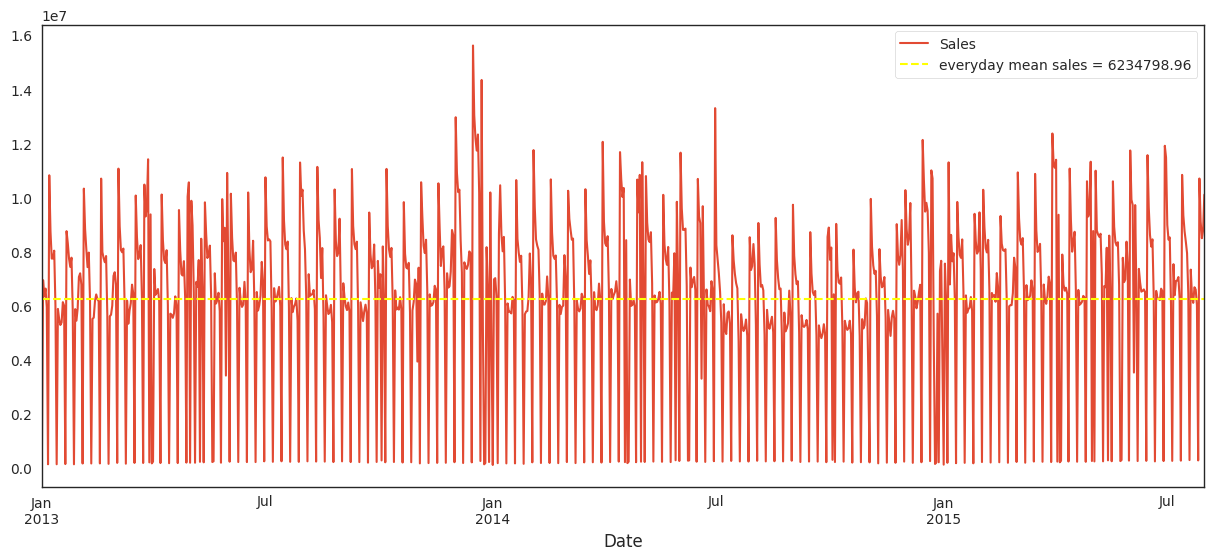

In [35]:
import matplotlib.pyplot as plt

# Visualizing everyday sales with average everyday sales
fig, ax = plt.subplots(figsize=(15, 6))

eday_sales = df.groupby(["Date"]).Sales.sum()
eday_sales.plot(kind="line", ax=ax)

# Calculate and print the mean of everyday sales
mean_sales = round(eday_sales.mean(), 2)
plt.axhline(y=mean_sales, label=f"everyday mean sales = {mean_sales}", color="yellow", linestyle="--")

# Add a legend to the plot
plt.legend()

# Print the mean value
print(f"Mean Sales: {mean_sales}")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The line chart was chosen to visualize daily sales trends over time because it's ideal for displaying time series data and comparing daily sales with the mean, facilitating trend analysis and outlier detection.






##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that the mean daily sales value is approximately $6,234,798.96. This provides a reference point to evaluate daily sales performance, helping identify days with sales significantly above or below this average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The knowledge of the mean daily sales value provides a useful reference point for evaluating daily sales performance and making informed decisions. It helps identify strengths and areas for improvement, but negative growth depends on broader factors and actions taken.

#### Chart - 2



Average Sales by Store Type:
a: 5738.18 (21.1%)
b: 10058.84 (37.0%)
c: 5723.63 (21.1%)
d: 5641.82 (20.8%)


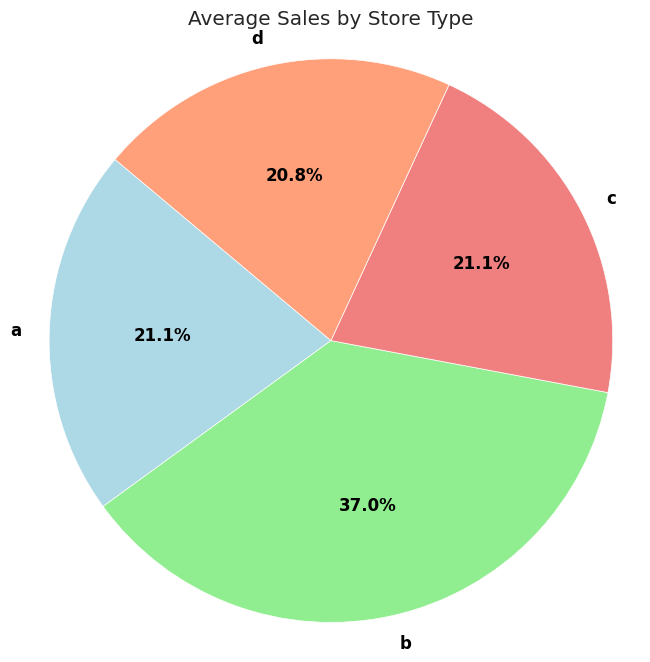

In [36]:
import matplotlib.pyplot as plt

# Calculate the average sales by store type
average_sales_by_store_type = df.groupby("StoreType")["Sales"].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(average_sales_by_store_type, labels=average_sales_by_store_type.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'], textprops={'color': 'black'})
plt.title("Average Sales by Store Type")

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the percentage values and numeric values
for text, autotext in zip(texts, autotexts):
    text.set(size=12, weight='bold')
    autotext.set(size=12, weight='bold')


# Print the average sales by store type
print("Average Sales by Store Type:")
for store_type, average_sales in average_sales_by_store_type.items():
    print(f"{store_type}: {average_sales:.2f} ({autotexts[average_sales_by_store_type.index.get_loc(store_type)].get_text()})")

# Display the pie chart
plt.show()


##### 1. Why did you pick the specific chart?

I chose a pie chart to visualize the distribution of average sales by store type because it effectively conveys the proportion of sales for each store type, making it easy to compare and understand the contribution of each store type to the overall sales.

##### 2. What is/are the insight(s) found from the chart?

The pie chart shows the distribution of average sales by store type, and the insights from the chart are:

1. Store type 'b' has the highest average sales, contributing the most to total sales (37.0%).
2. Store types 'a', 'c', and 'd' have relatively similar average sales contributions (around 20-21%).

This chart helps identify the varying impact of different store types on overall sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights from the pie chart can positively impact the business by highlighting the store type 'b' as a key contributor to sales. Focusing on optimizing store type 'b' operations could lead to increased overall sales. However, there are no insights that directly suggest negative growth.

#### Chart - 3

0.0: 4406.05
1.0: 7991.15


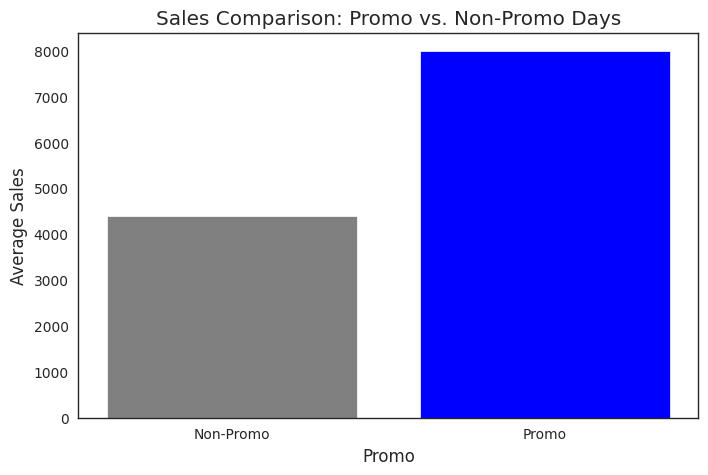

In [37]:
promotion_impact = df.groupby("Promo")["Sales"].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(promotion_impact["Promo"].map({0: "Non-Promo", 1: "Promo"}), promotion_impact["Sales"], color=["gray", "blue"])
plt.title("Sales Comparison: Promo vs. Non-Promo Days")
plt.xlabel("Promo")
plt.ylabel("Average Sales")

# Display the average sales for Promo and Non-Promo Days
for promo, avg_sales in promotion_impact.iterrows():
    print(f"{avg_sales['Promo']}: {avg_sales['Sales']:.2f}")

# Show the bar chart
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the comparison between average sales on Promo and Non-Promo days because it effectively presents the difference in sales between these two categories. The use of distinct bars for each category makes it easy to compare the sales values visually.

##### 2. What is/are the insight(s) found from the chart?

On Promo days (1.0), the average sales are significantly higher (7991.15) compared to Non-Promo days (0.0) with an average of 4406.05.

This suggests that promotional activities have a positive impact on sales, leading to higher revenue on the days when promotions are active.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights indicate that implementing promotions positively impacts sales, potentially leading to increased revenue. However, neglecting to utilize promotions strategically may result in missed growth opportunities, but there are no direct insights suggesting negative growth.

#### Chart - 4

0: 5947.48
a: 290.74
b: 214.31
c: 168.73


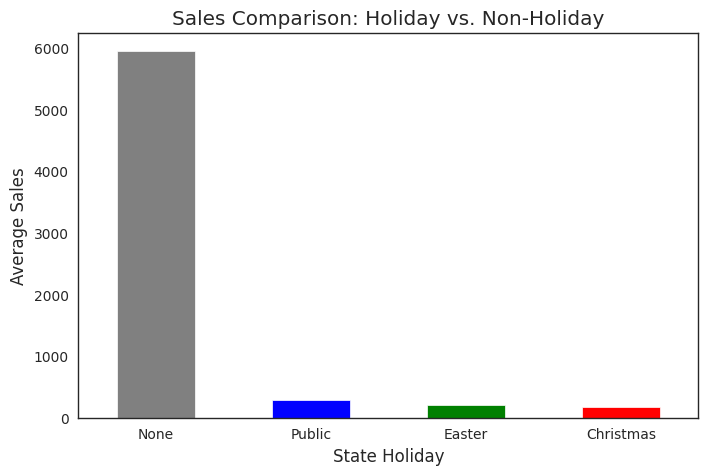

In [38]:
fig, ax = plt.subplots(figsize=(8, 5))

holiday_sales = df.groupby("StateHoliday")["Sales"].mean()
holiday_sales.plot(kind="bar", ax=ax, color=["gray", "blue", "green", "red"])
plt.title("Sales Comparison: Holiday vs. Non-Holiday")
plt.xlabel("State Holiday")
plt.ylabel("Average Sales")
plt.xticks(range(4), ["None", "Public", "Easter", "Christmas"], rotation=0)

# Display the average sales for each type of holiday
for holiday_type, avg_sales in holiday_sales.items():
    print(f"{holiday_type}: {avg_sales:.2f}")

# Show the bar chart
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart was chosen to visually compare average sales between different types of holidays.







##### 2. What is/are the insight(s) found from the chart?

On days categorized as "Public" holidays (label 'a'), there is a notable decrease in average sales.

"Easter" and "Christmas" holidays (labels 'b' and 'c') also show lower average sales compared to non-holiday days.

"None" days have the highest average sales, indicating that non-holidays tend to have stronger sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights suggest that promotions or marketing strategies could be implemented on holiday days to boost sales, particularly on "Public" holidays.

On non-holidays, maintaining strong sales practices is crucial to capitalize on higher average sales.

These insights can potentially help create a positive business impact by tailoring strategies based on holiday types. However, it's important to carefully plan and execute promotions to avoid negative growth during holidays.

#### Chart - 5

Average Sales (Promo2): 5423.72
Average Sales (Non-Promo2): 6124.71


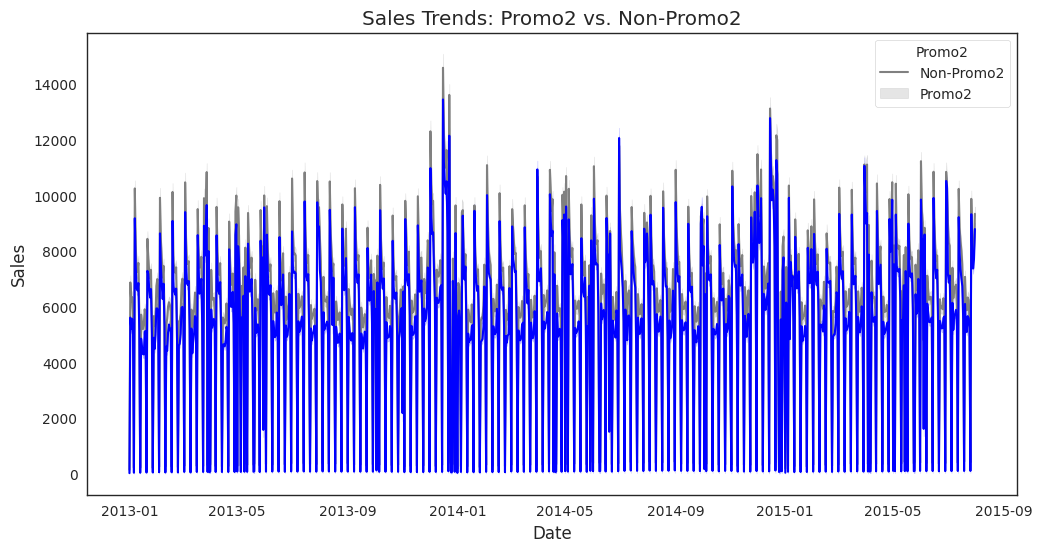

In [39]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Sales", hue="Promo2", palette=["gray", "blue"])
plt.title("Sales Trends: Promo2 vs. Non-Promo2")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="Promo2", labels=["Non-Promo2", "Promo2"])

# Calculate and print the average sales for Promo2 and Non-Promo2 days
avg_sales_promo2 = df[df["Promo2"] == 1]["Sales"].mean()
avg_sales_non_promo2 = df[df["Promo2"] == 0]["Sales"].mean()
print(f"Average Sales (Promo2): {avg_sales_promo2:.2f}")
print(f"Average Sales (Non-Promo2): {avg_sales_non_promo2:.2f}")

# Show the plot
plt.show()



##### 1. Why did you pick the specific chart?

I chose a line plot with the "Sales Trends: Promo2 vs. Non-Promo2" to visualize the sales trends over time for both Promo2 and Non-Promo2 days, as it effectively displays the variations.

##### 2. What is/are the insight(s) found from the chart?

The insight from the chart shows that on average, sales are higher on Non-Promo2 days compared to Promo2 days. This suggests that the presence of Promo2 promotions does not significantly boost sales compared to regular days.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights may help in optimizing promotional strategies. While Promo2 days have lower average sales, there might be other factors at play, and further analysis is needed to determine if these insights can lead to positive business impact, such as reallocating resources or adjusting promotion strategies accordingly.

#### Chart - 6

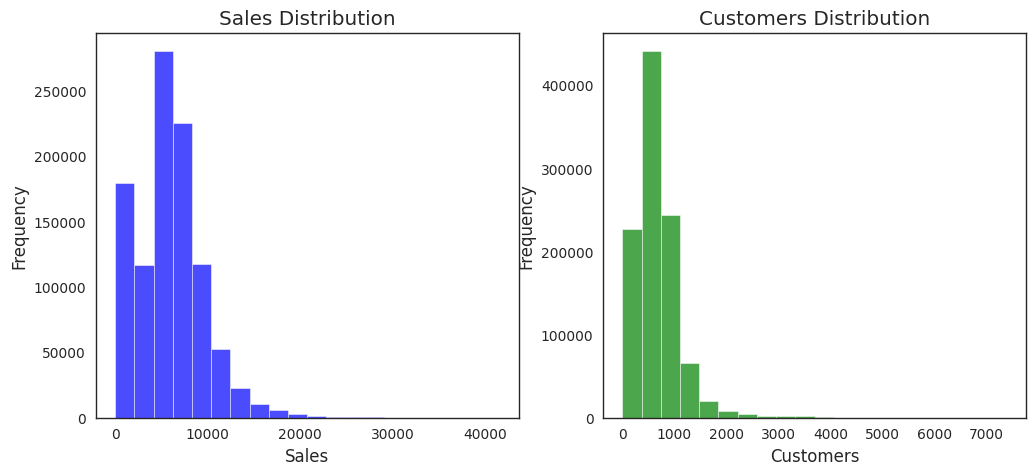

In [40]:
# Visualizing sales and customers separately using histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Sales distribution histogram
df["Sales"].plot(kind="hist", bins=20, ax=ax1, color="blue", alpha=0.7)
ax1.set_title("Sales Distribution")
ax1.set_xlabel("Sales")
ax1.set_ylabel("Frequency")

# Customers distribution histogram
df["Customers"].plot(kind="hist", bins=20, ax=ax2, color="green", alpha=0.7)
ax2.set_title("Customers Distribution")
ax2.set_xlabel("Customers")
ax2.set_ylabel("Frequency")

# Display the histograms
plt.show()


##### 1. Why did you pick the specific chart?

 I chose histograms to visualize the distributions of sales and customers separately because histograms are effective for showing the frequency or count of values within specified bins, allowing us to understand the distribution patterns.

##### 2. What is/are the insight(s) found from the chart?

From the Sales Distribution histogram, we can see that the majority of sales fall within a specific range, which may indicate a common sales pattern. The Customers Distribution histogram shows a similar pattern for customer counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help businesses understand the typical sales and customer count distribution patterns, which may aid in making informed decisions related to inventory management, staffing, and resource allocation. However, further analysis is needed to determine specific actions that could lead to a positive impact.

#### Chart - 7

0    835488
1    181721
Name: SchoolHoliday, dtype: int64


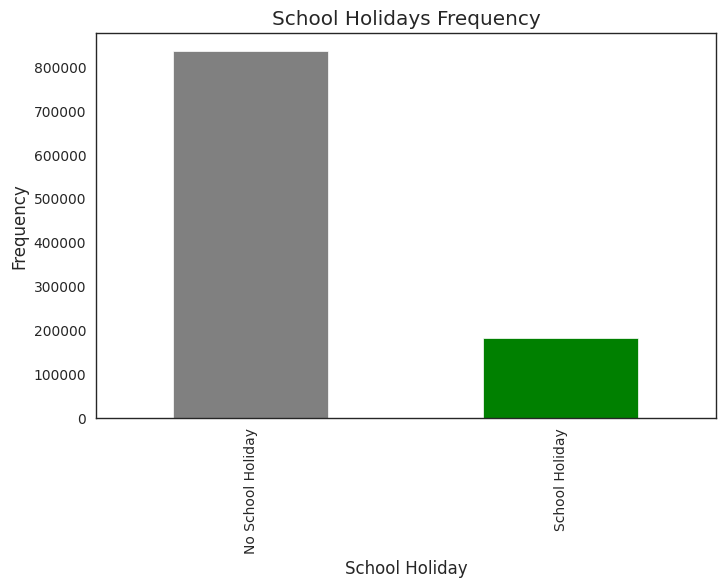

In [41]:
# Visualizing the frequency of school holidays
plt.figure(figsize=(8, 5))

school_holidays = df["SchoolHoliday"].value_counts()
school_holidays.plot(kind="bar", color=["gray", "green"])
plt.title("School Holidays Frequency")
plt.xlabel("School Holiday")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["No School Holiday", "School Holiday"])
print(school_holidays)
# Display the bar chart
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart to visualize the frequency of school holidays because it effectively displays the count of occurrences for each category (No School Holiday and School Holiday).

##### 2. What is/are the insight(s) found from the chart?

 The chart shows that there are significantly more days without school holidays (835,488 days) compared to days with school holidays (181,721 days) in the dataset.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can help businesses plan for school holiday periods, allocate resources effectively, and tailor marketing strategies to maximize positive business impact during school holidays. However, it's essential to consider other factors that may influence sales and customer traffic during these periods.

#### Chart - 8

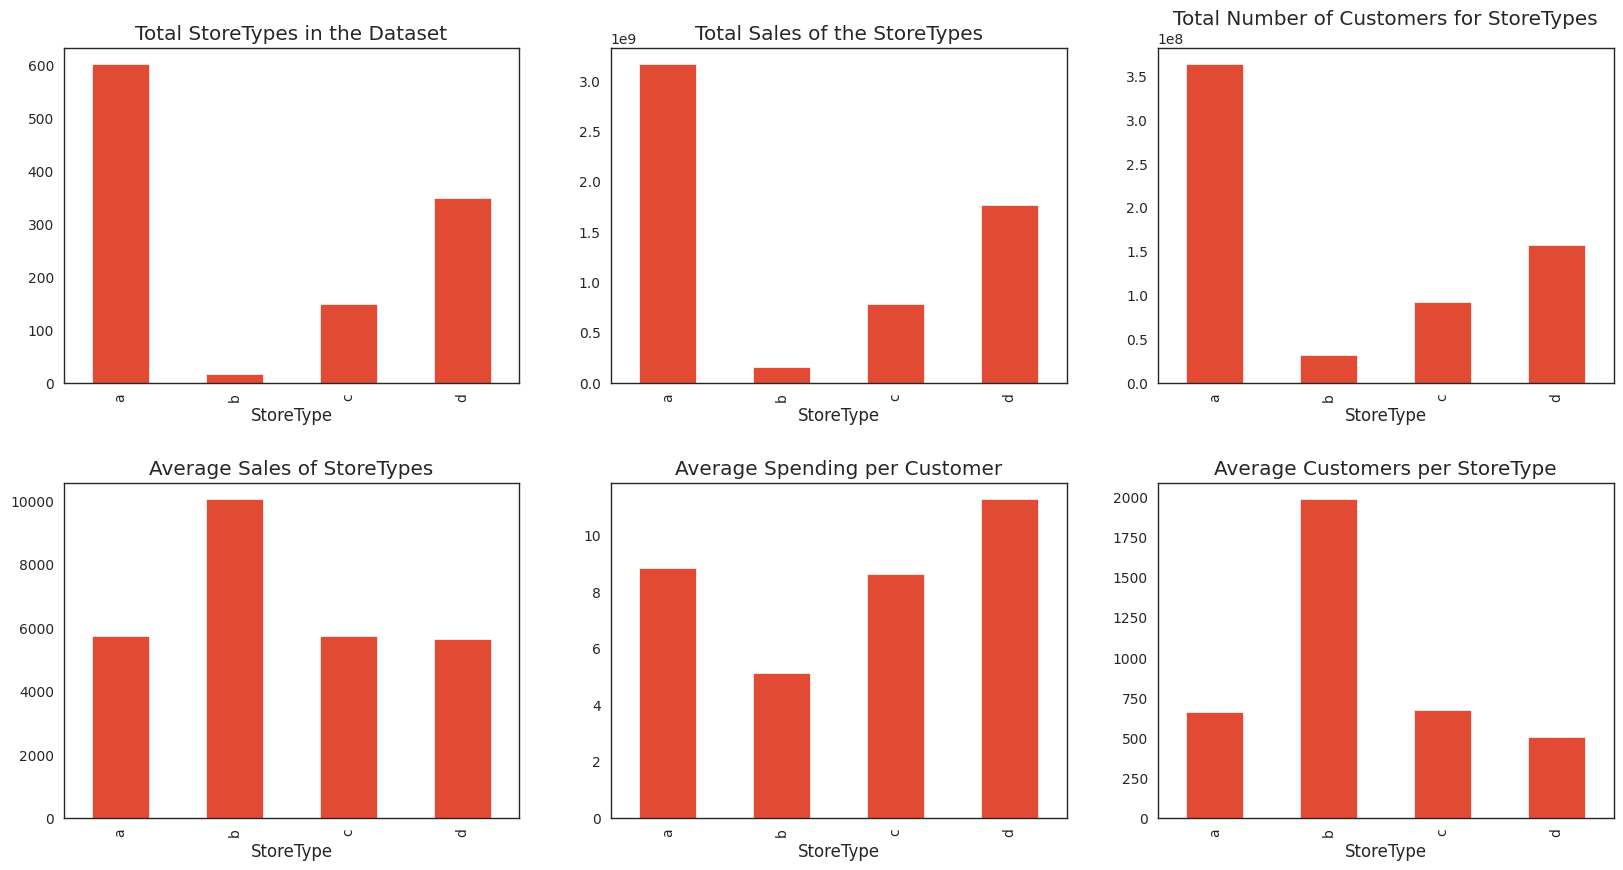

In [42]:
# Calculate Average Spending per Customer
df["Avg_Customer_Sales"] = df["Sales"] / df["Customers"]

# Create subplots with multiple bar charts
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Total StoreTypes in the Dataset
store_df.groupby("StoreType")["Store"].count().plot(kind="bar", ax=ax[0, 0], title="Total StoreTypes in the Dataset")

# Total Sales of the StoreTypes
df.groupby("StoreType")["Sales"].sum().plot(kind="bar", ax=ax[0, 1], title="Total Sales of the StoreTypes")

# Total Number of Customers for StoreTypes
df.groupby("StoreType")["Customers"].sum().plot(kind="bar", ax=ax[0, 2], title="Total Number of Customers for StoreTypes")

# Average Sales of StoreTypes
df.groupby("StoreType")["Sales"].mean().plot(kind="bar", ax=ax[1, 0], title="Average Sales of StoreTypes")

# Average Spending per Customer
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind="bar", ax=ax[1, 1], title="Average Spending per Customer")

# Average Customers per StoreType
df.groupby("StoreType")["Customers"].mean().plot(kind="bar", ax=ax[1, 2], title="Average Customers per StoreType")

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.3)

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

 I chose bar charts to compare and visualize various aspects of store types, including their total count, total sales, total number of customers, average sales, average spending per customer, and average number of customers per store type. Bar charts are effective for comparing categories.

##### 2. What is/are the insight(s) found from the chart?

The chart "Total StoreTypes in the Dataset" shows the count of each store type, with type "a" having the highest count.

The chart "Total Sales of the StoreTypes" reveals that store type "b" has the highest total sales.

In "Total Number of Customers for StoreTypes," store type "a" has the most customers.

"Average Sales of StoreTypes" shows that store type "b" has the highest average sales.

"Average Spending per Customer" indicates that store type "b" also has the highest average spending per customer.

In "Average Customers per StoreType," store type "d" has the highest average number of customers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help businesses tailor their strategies for different store types. For example, they can focus marketing efforts on store type "b," which has both high average sales and high average spending per customer, potentially leading to increased revenue. However, it's essential to consider other factors that may influence these metrics and to analyze the cost-effectiveness of targeting specific store types.

#### Chart - 9

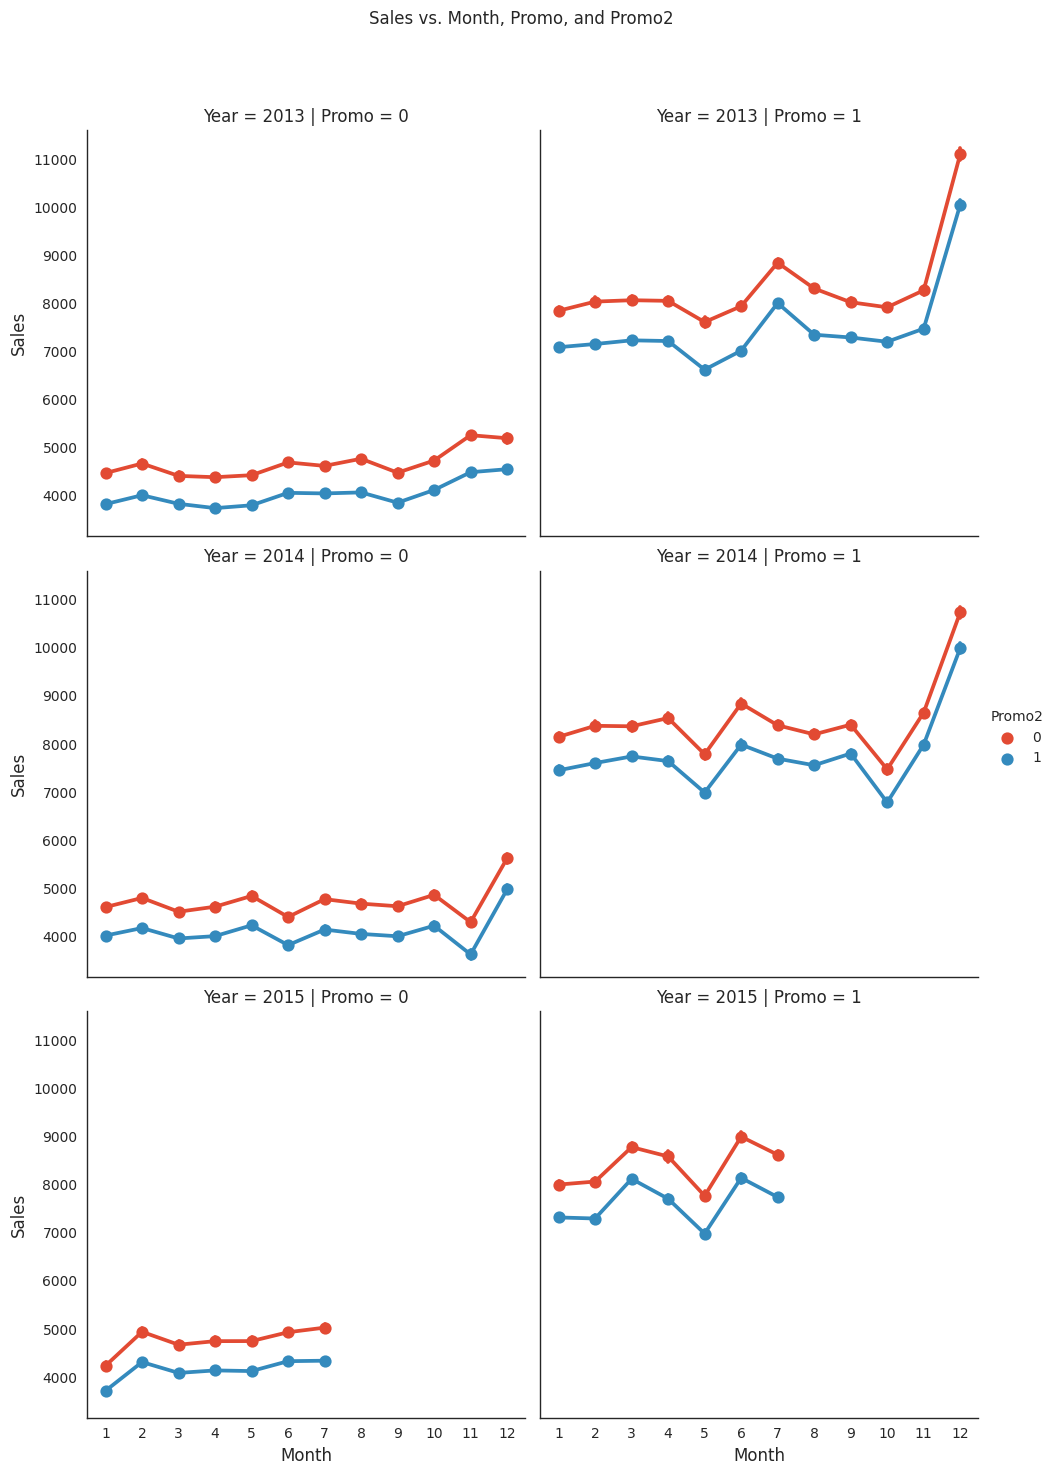

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a factor plot using catplot
sns.catplot(data=df, x="Month", y="Sales", col='Promo', hue='Promo2', row="Year", kind="point")

# Add a title
plt.subplots_adjust(top=0.9)
plt.suptitle("Sales vs. Month, Promo, and Promo2")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

 I chose a factor plot using catplot because it allows us to visualize the relationship between multiple categorical variables (Month, Promo, Promo2) and the numeric variable (Sales) across different years. This type of plot helps in understanding how these factors interact and influence sales.

##### 2. What is/are the insight(s) found from the chart?

The chart shows how sales vary across different months for stores with and without promotions (Promo) and whether they have ongoing promotions (Promo2).

It is evident that stores with promotions generally have higher sales.

The impact of Promo2 on sales seems less pronounced, with some variation across different months and years.

There is seasonality in sales, with certain months consistently having higher sales across all years.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help businesses optimize their promotional strategies. By understanding the influence of Promo and Promo2 on sales and recognizing the seasonality trends, businesses can plan their promotions more effectively, potentially leading to increased sales during specific months and years. However, a deeper analysis is needed to fine-tune these strategies and assess their actual impact on business outcomes.

#### Chart - 10

<ipython-input-44-3a1a914ccf0d>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=open_df, x="Month", y="Sales", hue="Year", ci=None, palette=palette)


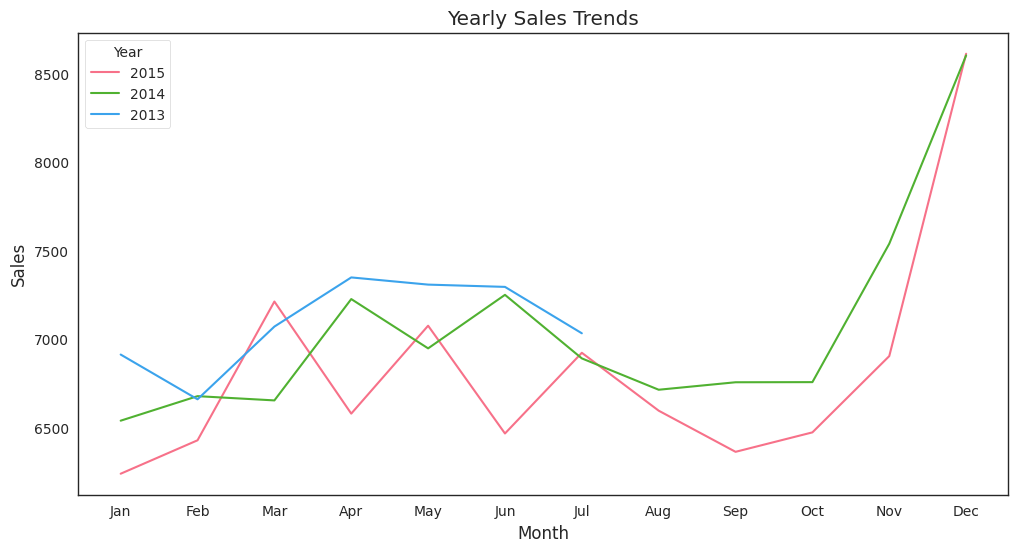

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for open stores (assuming Open is a binary column)
open_df = df[df['Open'] == 1]

# Create a color palette for each year
palette = sns.color_palette("husl", n_colors=len(open_df['Year'].unique()))

# Create line plots for sales trends on a yearly basis
plt.figure(figsize=(12, 6))
sns.lineplot(data=open_df, x="Month", y="Sales", hue="Year", ci=None, palette=palette)
plt.title("Yearly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title="Year", labels=open_df['Year'].unique())

# Customize x-axis labels to show all 12 months
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

I chose a line plot to visualize yearly sales trends because it allows us to observe how sales evolve over the months within each year. Using different colors for each year (hue), we can easily compare sales patterns across multiple years.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals the seasonality in sales, with recurring patterns throughout the year for each year.

Sales tend to peak during certain months ( December) and dip during others ( June).

Yearly trends show variations, indicating that specific years had better or worse performance during different months.

The insights suggest that businesses can anticipate high and low sales periods and plan their inventory and promotions accordingly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Yes, the insights gained from this chart can have a positive business impact. By understanding the seasonality and yearly sales trends, businesses can optimize their strategies. For example, they can increase marketing efforts and stock levels during peak sales months, leading to increased revenue. Additionally, they can identify underperforming months and develop targeted promotions to mitigate potential negative impacts. Overall, this knowledge helps in better resource allocation and improved business planning.

#### Chart - 11

Year: 2013
Month with Highest Sales: 12 (Sales: 6703.62)
Month with Highest Customers: 12 (Customers: 690.85)
----------------------------------------
Year: 2014
Month with Highest Sales: 12 (Sales: 6973.28)
Month with Highest Customers: 12 (Customers: 717.63)
----------------------------------------
Year: 2015
Month with Highest Sales: 6 (Sales: 6199.20)
Month with Highest Customers: 6 (Customers: 647.09)
----------------------------------------


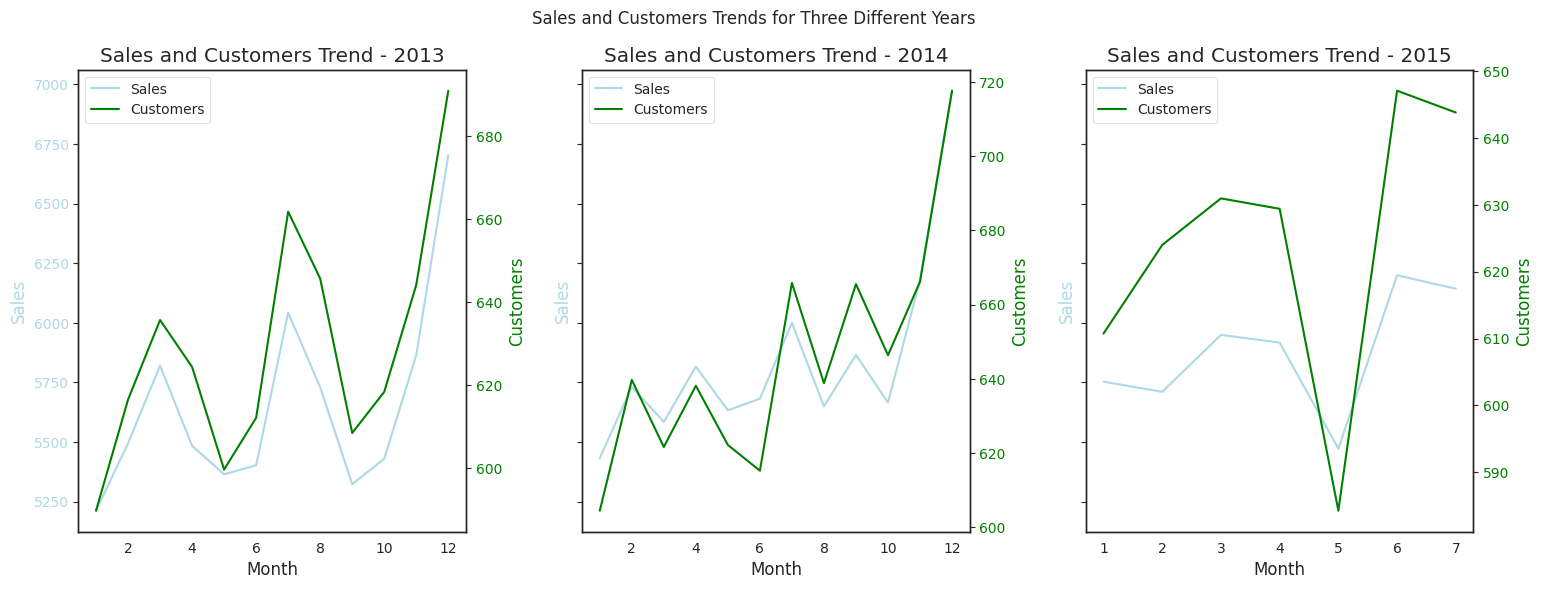

In [45]:
import matplotlib.pyplot as plt

# Create a list of years to loop through
years_to_plot = [2013, 2014, 2015]

# Set up subplots for multiple years
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Sales and Customers Trends for Three Different Years')

# Loop through each year and calculate insights, then create the dual-axis plot
for i, year in enumerate(years_to_plot):
    # Filter the data for the specific year
    year_data = df[df['Year'] == year]

    # Calculate the average sales and customers for each month
    monthly_data = year_data.groupby("Month")[["Sales", "Customers"]].mean()

    # Calculate insights
    max_sales_month = monthly_data["Sales"].idxmax()
    max_sales_value = monthly_data["Sales"].max()
    max_customers_month = monthly_data["Customers"].idxmax()
    max_customers_value = monthly_data["Customers"].max()

    # Print insights for the year
    print(f"Year: {year}")
    print(f"Month with Highest Sales: {max_sales_month} (Sales: {max_sales_value:.2f})")
    print(f"Month with Highest Customers: {max_customers_month} (Customers: {max_customers_value:.2f})")
    print("-" * 40)

    # Plotting Sales on the primary y-axis
    ax1 = axes[i]
    ax1.plot(monthly_data.index, monthly_data["Sales"], color='lightblue', label='Sales')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Sales', color='lightblue')
    ax1.tick_params(axis='y', labelcolor='lightblue')
    ax1.set_title(f'Sales and Customers Trend - {year}')

    # Creating a twin axis for Customers on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(monthly_data.index, monthly_data["Customers"], color='green', label='Customers')
    ax2.set_ylabel('Customers', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add legend for both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.3)

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

 I chose the dual-axis line chart for sales and customers trends over three years because it allows for a clear visual comparison of how sales and customer numbers correlate throughout the year, providing insights into potential patterns or relationships.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that, in each of the three years (2013, 2014, and 2015), the highest sales and customer counts occurred in December. This suggests a strong seasonal trend, likely associated with holiday shopping. Additionally, sales and customer trends closely follow each other, indicating a positive correlation between these two factors.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 The insights gained from this chart can help businesses prepare for the holiday season and allocate resources effectively. However, if the business relies heavily on seasonal trends, it may experience negative growth during non-peak months if it does not have strategies in place to mitigate this seasonality. Therefore, the insights can be valuable for business planning and growth but should be balanced with strategies to maintain stability during off-peak periods.

#### Chart - Correlation Heatmap

<ipython-input-46-50155318be4f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


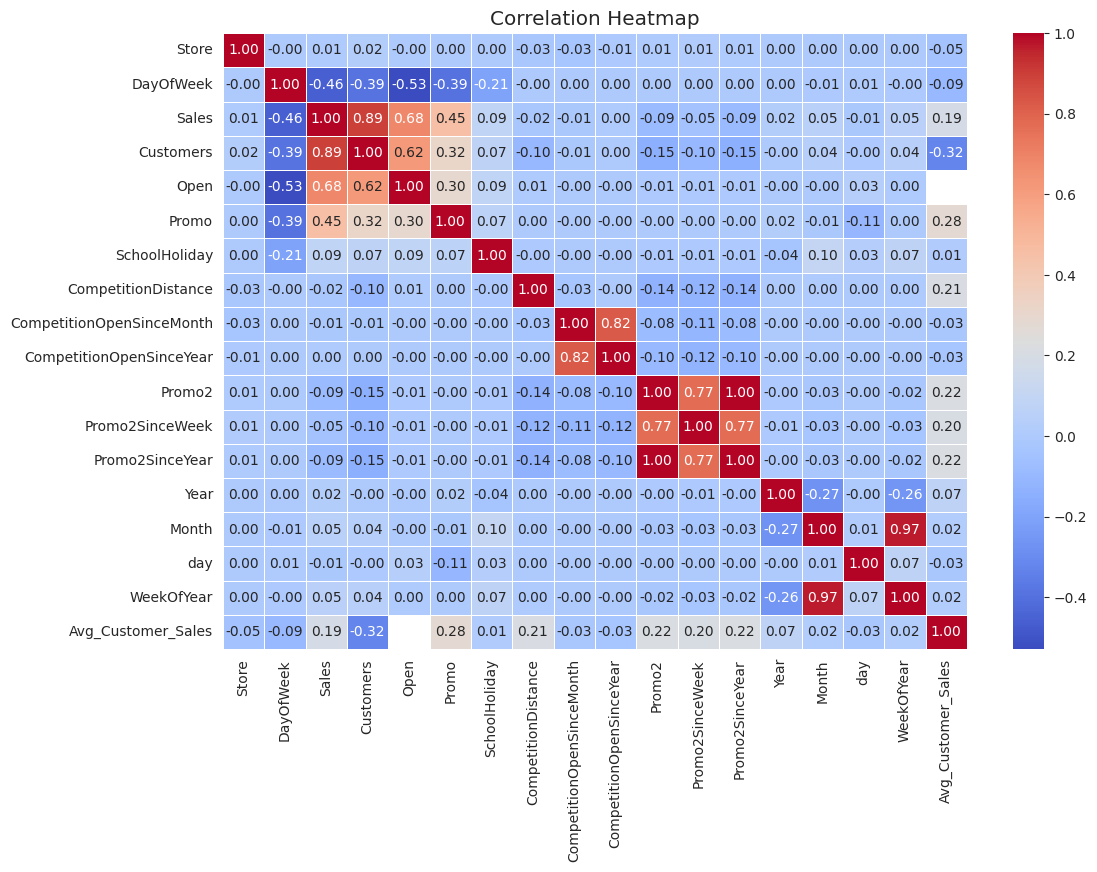

In [46]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

To check for correlation among the features visually

##### 2. What is/are the insight(s) found from the chart?

We observe that Sales is highly Correlated with Customers as see from the previous charts. Also, Sales is highly Correlated with Promo also, showing how promo influences Sales to a high extent.

#### Chart  - Pair Plot

<Figure size 800x600 with 0 Axes>

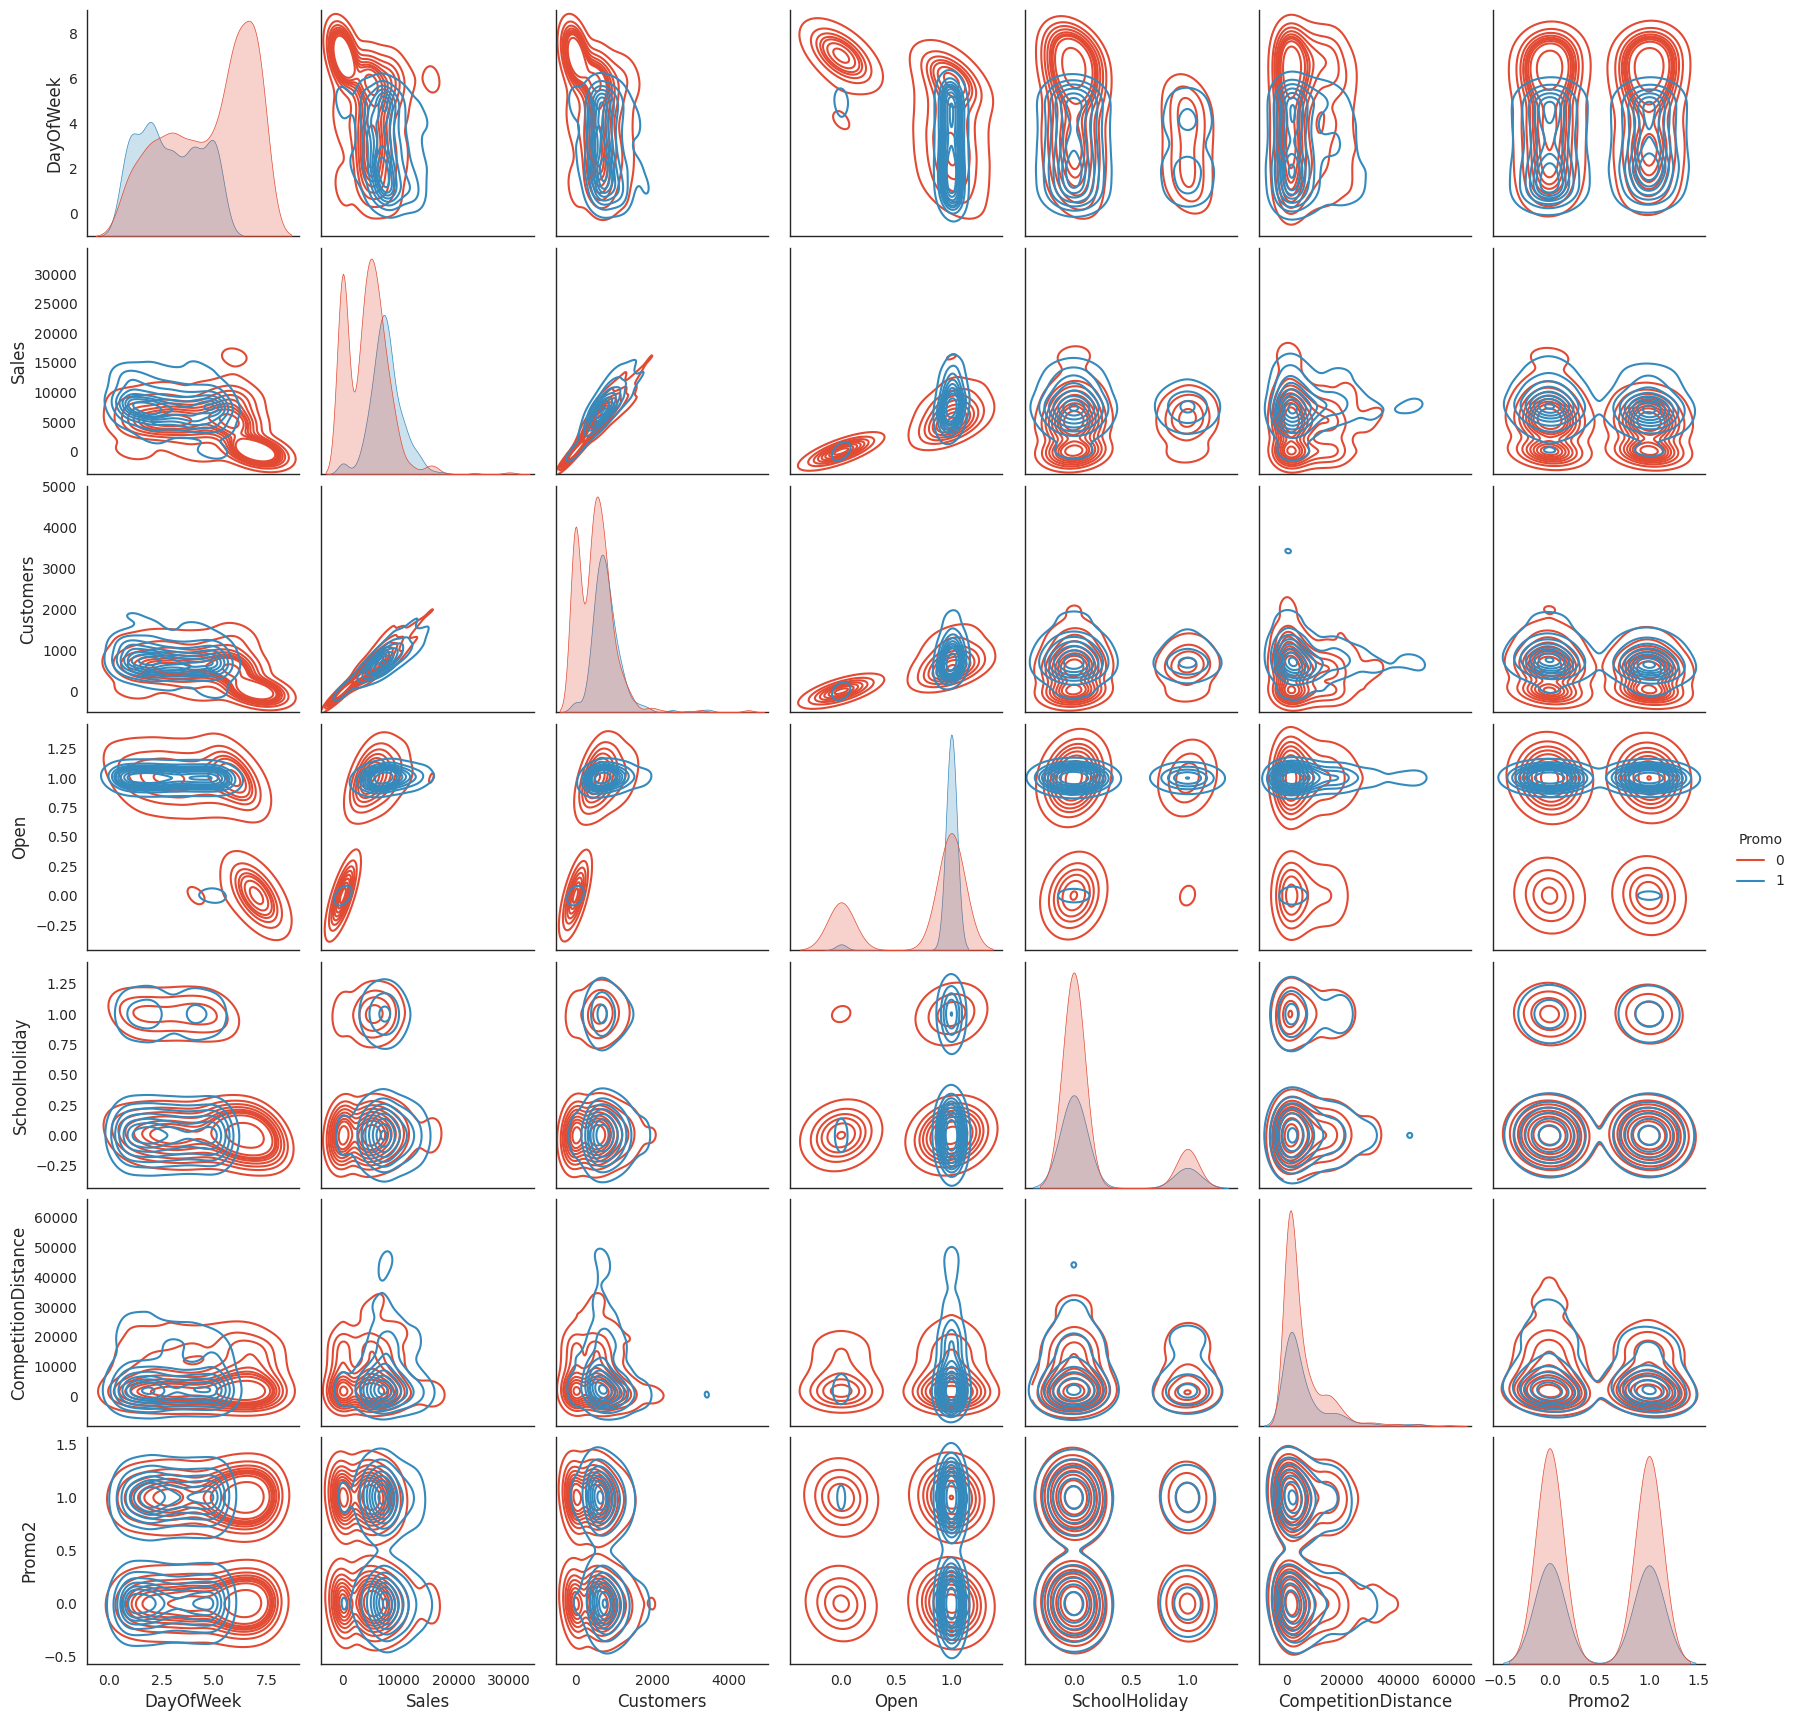

In [47]:
# Pair Plot visualization code

# Reduce columns and rows for analysis as computation time is high with 1000 rows
sub_df = df.sample(n=1000)[['DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'Promo2']]

plt.figure()
sns.pairplot(sub_df, hue="Promo", kind="kde", diag_kind="kde")
plt.show()


##### 1. Why did you pick the specific chart?

With correlation chart we tried to see the linear relationship between Columns.

Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

##### 2. What is/are the insight(s) found from the chart?

Since most of the columns are categorical, a scatter plot in pair plot will not reveal much information. However we can still confirm from the pair plot using KDE plot that  Zero Sales is Concentrated around Sunday( Day 7) and Open column is zero around Day 7, implying closed store on a Sunday is causing zero sales around Day 7.

Also with promo=1, the orange line are at the higher end with implying more Sales

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Hypothetical Statement 1:
Statement: The average sales on school holidays are significantly higher than the average sales on non-school holidays.

Hypothetical Statement 2:
Statement: The average sales on promotional days (Promo = 1) are significantly higher than the average sales on non-promotional days (Promo = 0).

Hypothetical Statement 3:
Statement: Stores with different store types (StoreType) have significantly different average sales.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: “Promo” and “Sales” are independent to each other.

Alternative hypothesis: “Promo” and “Sales” are dependent to each other.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value
#importing library for z test
from statsmodels.stats import weightstats as stests

df_promo_1=df[df["Promo"]==1]["Sales"]
df_promo_0=df[df["Promo"]==0]["Sales"]

#applying z-test
ztest ,probability_value = stests.ztest(df_promo_1, df_promo_0,value=0)
print("Z statistic=",ztest)
print("P- value= ",float(probability_value))

#two tailed test
if probability_value<0.025 or probability_value>0.975:
  print("Null hypothesis rejected , Alternative hypothesis accepted")
else:
  print("Null hypothesis accepted")

Z statistic= 511.54718673163774
P- value=  0.0
Null hypothesis rejected , Alternative hypothesis accepted
